In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

2022-03-29 21:20:06.348640: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 21:20:06.348710: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.8.0'

In [2]:
df = pd.read_csv('data/kc_house_data.csv', delimiter = ',', encoding='ISO-8859-1')

In [3]:
df['date'] = pd.to_datetime(df.date, format = '%Y%m%dT%H%M%S')

df = df.sort_values(by='date')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
# Verificando o numero de amostras (linhas) e features (colunas) do dataset. 
print('Amostras e Features:', df.shape)

Amostras e Features: (21613, 21)


In [7]:
# Verificando quais são os tipos das features
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 16768 to 16594
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   

# Exploration Data Analysis (EDA)

Text(0, 0.5, 'Price')

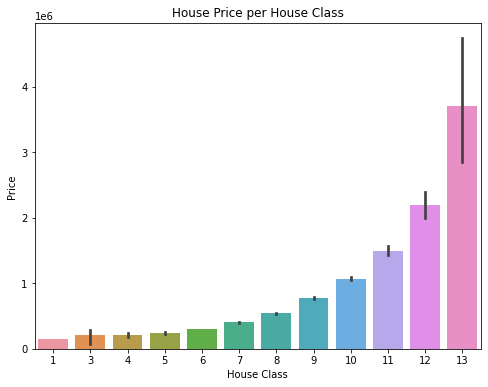

In [9]:
plt.figure(figsize=(8,6))

sns.barplot(x='grade',y='price', data=df)
plt.title('House Price per House Class')
plt.xlabel('House Class')
plt.ylabel('Price')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

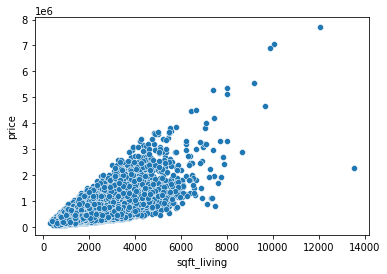

In [10]:
#looking for outliers. the one in the bottom right we should probably eliminate
sns.scatterplot(x='sqft_living', y='price', data=df)

In [11]:
df[df.sqft_living > 10000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
3914,9808700762,2014-06-11,7062500.0,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [12]:
df = df[df.sqft_living < 13000]

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

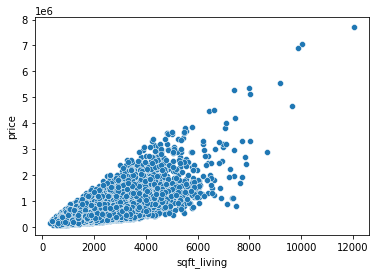

In [13]:
sns.scatterplot(data=df, x='sqft_living', y='price')

<AxesSubplot:>

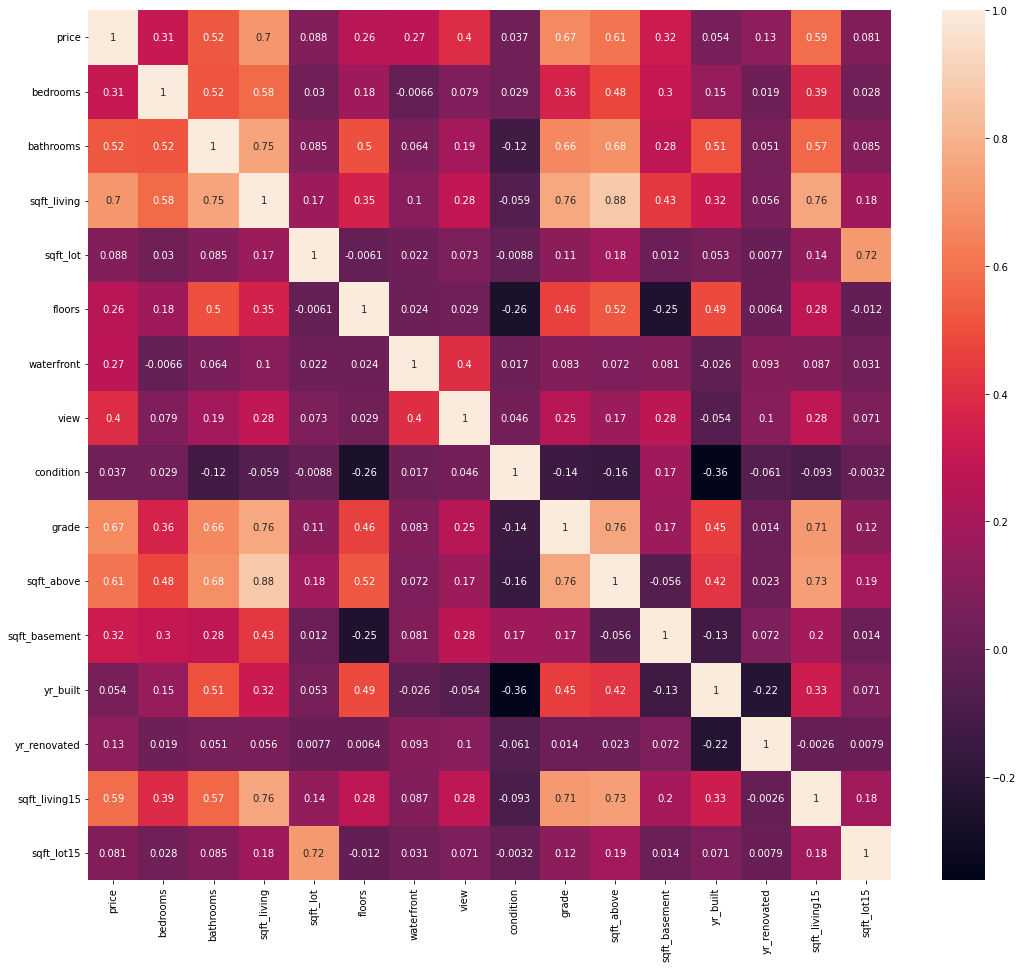

In [14]:
numeric_collumns = df.copy().drop(columns=['id', 'date', 'lat', 'long', 'zipcode'])

plt.figure(figsize=(18,16))

sns.heatmap(numeric_collumns.corr(), annot=True)

In [15]:
#newer homes should impact the value
df['year'] = df['date'].apply(lambda date: date.year) 
#Some months see greater home sales and may have a large impact on price
df['month'] = df.date.apply(lambda date: date.month) 

<AxesSubplot:xlabel='month', ylabel='price'>

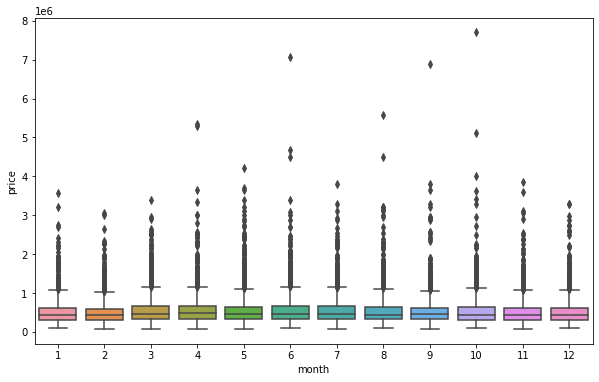

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

In [17]:
df.drop('date', axis=1, inplace=True)

In [18]:
# time to deal with those zipcodes, some zipcodes will 
# positively impact price, some negatively, so lets 
# create dummy variables
zipcode=['zipcode'] 
df = pd.get_dummies(df,columns=zipcode)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

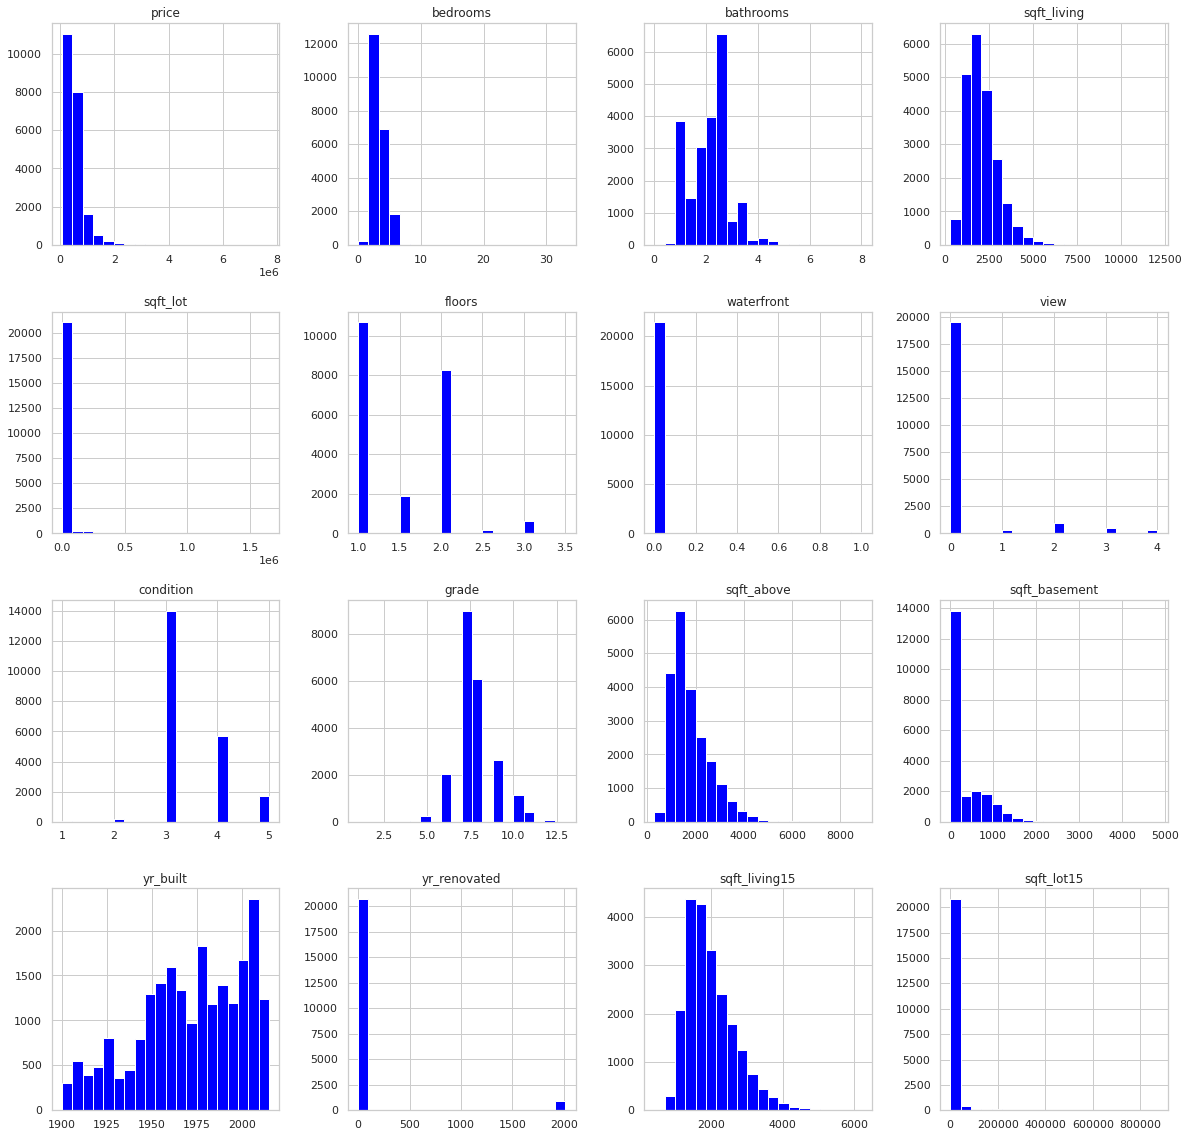

In [121]:
numeric_collumns.hist(bins=20, figsize=(20,20), color='blue')

In [19]:
features = ['bathrooms', 'bedrooms', 'grade', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_basement']

X = df[features]
X.head()

,bathrooms,bedrooms,grade,sqft_above,sqft_living,sqft_living15,sqft_basement
16768,2.25,3,9,1970,1970,2340,0
9596,2.50,3,9,1700,2600,2380,900
9587,2.50,5,8,2820,2820,2820,0
20602,2.50,4,8,3310,3310,2380,0
11577,2.25,4,8,1080,2160,1850,1080


In [20]:
y = df['price']
y = y.values.reshape(-1,1)

In [21]:
print(X.shape, y.shape)

(21612, 7) (21612, 1)


# Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [23]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split

# Trabalhando base classificacao
# divisão em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 5762)

In [24]:
X_train.shape, X_test.shape

((16209, 7), (5403, 7))

In [25]:
def build_model(input_shape): 
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dense(units=100, activation='relu'))
    model.add(tf.keras.layers.Dense(units=100, activation='relu'))
    model.add(tf.keras.layers.Dense(units=1, activation='linear'))
    return model

In [26]:
model = build_model((7,))

2022-03-29 21:20:52.887848: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-29 21:20:52.887883: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-29 21:20:52.887907: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (developer): /proc/driver/nvidia/version does not exist
2022-03-29 21:20:52.888149: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [29]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
406/406 [==============================] - 2s 4ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2/100
406/406 [==============================] - 1s 3ms/step - loss: 9.5326e-04 - val_loss: 8.5206e-04
Epoch 3/100
406/406 [==============================] - 1s 3ms/step - loss: 9.4621e-04 - val_loss: 7.7255e-04
Epoch 4/100
406/406 [==============================] - 1s 3ms/step - loss: 9.4443e-04 - val_loss: 0.0012
Epoch 5/100
406/406 [==============================] - 1s 3ms/step - loss: 9.2661e-04 - val_loss: 8.8152e-04
Epoch 6/100
406/406 [==============================] - 1s 3ms/step - loss: 9.0621e-04 - val_loss: 7.6080e-04
Epoch 7/100
406/406 [==============================] - 1s 3ms/step - loss: 9.1820e-04 - val_loss: 8.1106e-04
Epoch 8/100
406/406 [==============================] - 1s 3ms/step - loss: 9.0713e-04 - val_loss: 8.5160e-04
Epoch 9/100
406/406 [==============================] - 1s 3ms/step - loss: 8.8577e-04 - val_loss: 7.9179e-04
Epoch 10/100
406/406 [=========

In [30]:
def plot_model_loss(epochs_hist):
    plt.plot(epochs_hist.history['loss'])
    plt.plot(epochs_hist.history['val_loss'])

    plt.title('Model Loss Progression during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Training and Validation Loss')
    plt.legend(['Training Loss', 'Validation Loss'])

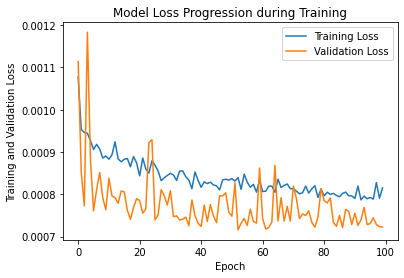

In [31]:
plot_model_loss(epochs_hist)

In [32]:
def plot_result_comparison(y_test, y_predict):
    plt.plot(y_test, y_predict, "^", color='red')
    plt.xlabel('Model predictions')
    plt.ylabel('True values')

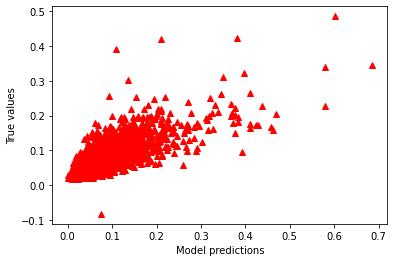

In [33]:
y_predict = model.predict(X_test)

plot_result_comparison(y_test, y_predict)

In [34]:
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)

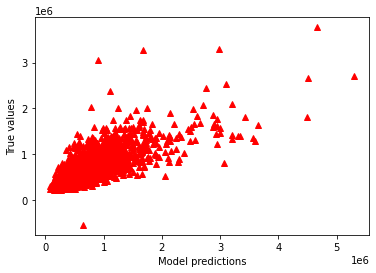

In [35]:
plot_result_comparison(y_test_original, y_predict_original)

In [36]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

def calculate_metrics(x_test, y_test_original, y_predict_original):
    n = len(X_test)
    k = X_test.shape[1]
    r2 = r2_score(y_test_original, y_predict_original)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)),'.3f'))
    MSE = mean_squared_error(y_test_original, y_predict_original)
    MAE = mean_absolute_error(y_test_original, y_predict_original)
    r2 = r2_score(y_test_original, y_predict_original)
    adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

    print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

In [37]:
calculate_metrics(X_test, y_test_original, y_predict_original)

RMSE = 233579.885 
MSE = 54559562721.22203 
MAE = 146661.53550689432 
R2 = 0.6091498934245503 
Adjusted R2 = 0.6086427663168528


## Adding more features

In [38]:
features = [
    'bathrooms', 'bedrooms', 'condition', 'grade', 
    'sqft_above', 'sqft_basement', 'sqft_living', 
    'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 
    'waterfront', 'yr_built', 'yr_renovated']

X = df[features]
X.head()

,bathrooms,bedrooms,condition,grade,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated
16768,2.25,3,4,9,1970,0,1970,2340,35100,35100,0,0,1977,0
9596,2.50,3,4,9,1700,900,2600,2380,4750,4750,0,0,1951,0
9587,2.50,5,3,8,2820,0,2820,2820,67518,48351,0,0,1979,0
20602,2.50,4,3,8,3310,0,3310,2380,6500,5000,0,0,2012,0
11577,2.25,4,3,8,1080,1080,2160,1850,8119,9000,0,0,1966,0


In [39]:
y = df['price']

In [40]:
scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)

scaled_y = scaler.fit_transform(y.values.reshape(-1,1))

In [41]:
# Trabalhando base classificacao
# divisão em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(scaled_X,
                                                    scaled_y,
                                                    test_size = 0.25,
                                                    random_state = 5762)

In [75]:
len(features)

14

In [72]:
# Retraining the model
model = build_model_b((len(features),))
model.compile(optimizer='Adam', loss='mean_squared_error')

In [73]:
X_train.shape, X_test.shape

((16209, 90), (5403, 90))

In [74]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


ValueError: in user code:

    File "/home/jlima/anaconda/envs/igti-env/lib/python3.10/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/jlima/anaconda/envs/igti-env/lib/python3.10/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/jlima/anaconda/envs/igti-env/lib/python3.10/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/jlima/anaconda/envs/igti-env/lib/python3.10/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/home/jlima/anaconda/envs/igti-env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/jlima/anaconda/envs/igti-env/lib/python3.10/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 14), found shape=(None, 90)


In [45]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 KB 2.9 MB/s eta 0:00:00


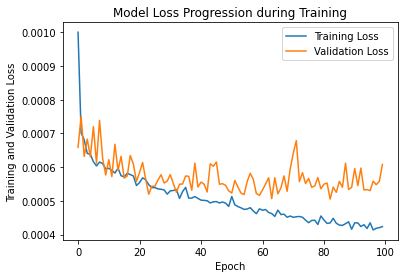

In [46]:
plot_model_loss(epochs_hist)

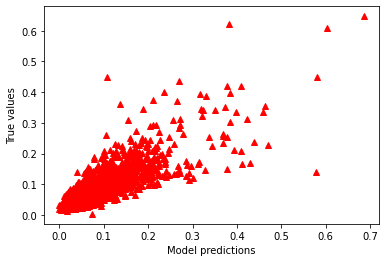

In [47]:
y_predict = model.predict(X_test)

plot_result_comparison(y_test, y_predict)

In [48]:
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

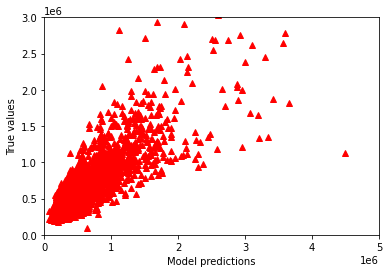

In [49]:
plot_result_comparison(y_test_original, y_predict_original)
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [50]:
calculate_metrics(X_test, y_test_original, y_predict_original)

RMSE = 205680.855 
MSE = 42304614268.43279 
MAE = 130620.87678720156 
R2 = 0.6969410645767744 
Adjusted R2 = 0.6961536063184364


In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [52]:
y_pred = reg.predict(X_test)

In [53]:
y_predict_original = scaler.inverse_transform(y_pred)
calculate_metrics(X_test, y_test_original, y_predict_original)

RMSE = 219593.164 
MSE = 48221157827.46395 
MAE = 141902.94928347963 
R2 = 0.6545565298542091 
Adjusted R2 = 0.6536589410305191


In [54]:
reg.score(X_test, y_test)

0.6545565298542091

In [55]:
#importar o modelo SVR
from sklearn.svm import SVR

# instanciacao e determinacao dos hiperparâmetros do SVR: tipo de kernel e epsilon
regression = SVR(kernel='rbf', epsilon=1.0)

# treinando o SVR
regression.fit(X_train, y_train)

/home/jlima/anaconda/envs/igti-env/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(epsilon=1.0)

In [71]:
y_pred2 = regression.predict(X_test)

In [72]:
y_pred2 = y_pred2.reshape(-1, 1)

In [73]:
y_predict_original = scaler.inverse_transform(y_pred2)
calculate_metrics(X_test, y_test_original, y_predict_original)

RMSE = 3371430.051 
MSE = 11366540591238.545 
MAE = 3351921.347029428 
R2 = -80.42685498012098 
Adjusted R2 = -80.63843181191788


In [69]:
regression.score(X_test, y_test)

-80.426854980121

In [75]:
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

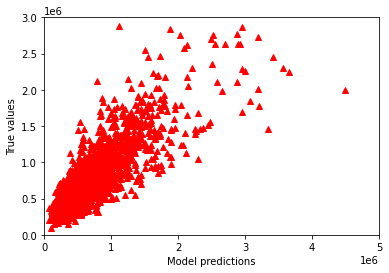

In [76]:
plot_result_comparison(y_test_original, y_predict_original)
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [79]:
# importar o modelo Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

y_train = y_train.reshape(-1, 1)

# treinando o modelo 
rf = RandomForestRegressor(n_estimators= 10, random_state=42).fit(X_train, y_train);

/tmp/ipykernel_18586/2742016992.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators= 10, random_state=42).fit(X_train, y_train);


In [80]:
# aplicando o modelo treinado para a previsão da temperatura 
#em todo o conjunto de teste
y_pred3 = regression.predict(X_test)

In [81]:
y_pred3 = y_pred3.reshape(-1, 1)

y_predict_original = scaler.inverse_transform(y_pred3)
calculate_metrics(X_test, y_test_original, y_predict_original)

RMSE = 3371430.051 
MSE = 11366540591238.545 
MAE = 3351921.347029428 
R2 = -80.42685498012098 
Adjusted R2 = -80.63843181191788


In [56]:
def build_model_b(input_shape): 
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=input_shape))
    # When using other datasets and experimenting, I have had a lot of success with 50% dropout  
    model.add(tf.keras.layers.Dropout(.5))                 
    model.add(tf.keras.layers.Dense(units=512, activation='relu'))
    model.add(tf.keras.layers.Dropout(.5))  
    model.add(tf.keras.layers.Dense(units=512, activation='relu'))
    model.add(tf.keras.layers.Dropout(.5))  
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dense(units=1))
    return model

In [57]:
# Retraining the model
model = build_model_b((len(features),))
model.compile(optimizer='Adam', loss='mse')

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               7680      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 512)              

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

#plan to set epochs deliberately too high and stop early
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose =1, patience=25) 

In [61]:
%%time
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
406/406 [==============================] - 6s 14ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 2/100
406/406 [==============================] - 6s 14ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/100
406/406 [==============================] - 5s 13ms/step - loss: 0.0011 - val_loss: 8.2487e-04
Epoch 4/100
406/406 [==============================] - 6s 14ms/step - loss: 9.7968e-04 - val_loss: 7.4027e-04
Epoch 5/100
406/406 [==============================] - 5s 13ms/step - loss: 8.9137e-04 - val_loss: 7.0053e-04
Epoch 6/100
406/406 [==============================] - 5s 13ms/step - loss: 8.9971e-04 - val_loss: 7.7583e-04
Epoch 7/100
406/406 [==============================] - 6s 15ms/step - loss: 8.8763e-04 - val_loss: 7.4754e-04
Epoch 8/100
406/406 [==============================] - 6s 15ms/step - loss: 9.2484e-04 - val_loss: 6.7554e-04
Epoch 9/100
406/406 [==============================] - 6s 15ms/step - loss: 8.4157e-04 - val_loss: 6.5636e-04
Epoch 10/100
406/406 [========

406/406 [==============================] - 10s 25ms/step - loss: 7.4703e-04 - val_loss: 6.4759e-04
Epoch 76/100
406/406 [==============================] - 9s 22ms/step - loss: 7.2166e-04 - val_loss: 6.1046e-04
Epoch 77/100
406/406 [==============================] - 6s 14ms/step - loss: 7.4807e-04 - val_loss: 6.4602e-04
Epoch 78/100
406/406 [==============================] - 5s 13ms/step - loss: 7.1999e-04 - val_loss: 9.3509e-04
Epoch 79/100
406/406 [==============================] - 6s 15ms/step - loss: 7.8176e-04 - val_loss: 7.0860e-04
Epoch 80/100
406/406 [==============================] - 11s 27ms/step - loss: 7.3505e-04 - val_loss: 6.3558e-04
Epoch 81/100
406/406 [==============================] - 5s 13ms/step - loss: 7.3147e-04 - val_loss: 6.7071e-04
Epoch 82/100
406/406 [==============================] - 6s 15ms/step - loss: 6.9487e-04 - val_loss: 7.0260e-04
Epoch 83/100
406/406 [==============================] - 10s 24ms/step - loss: 7.4741e-04 - val_loss: 6.2136e-04
Epoch 84/10

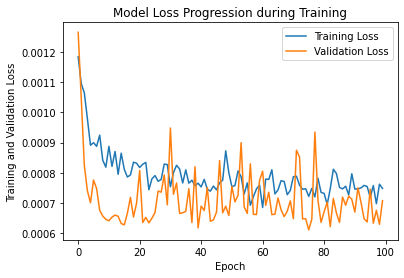

In [62]:
plot_model_loss(epochs_hist)

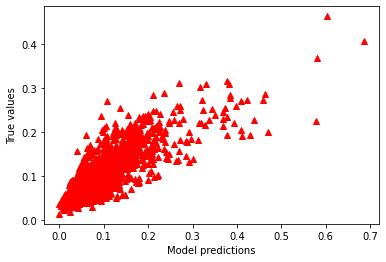

In [63]:
y_predict = model.predict(X_test)

plot_result_comparison(y_test, y_predict)

In [64]:
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

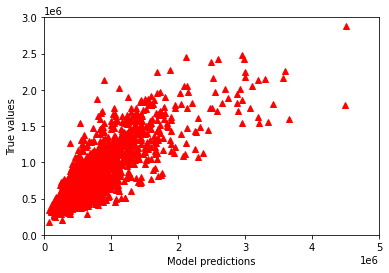

In [65]:
plot_result_comparison(y_test_original, y_predict_original)
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [66]:
calculate_metrics(X_test, y_test_original, y_predict_original)

RMSE = 209705.572 
MSE = 43976426742.09429 
MAE = 146281.52977801685 
R2 = 0.6849646474114918 
Adjusted R2 = 0.6841460700291162


In [67]:
reg.score(X_test, y_test)

0.6545565298542091

In [68]:
X = df.drop('price', axis=1)
y= df.price

In [69]:
# Scale the data for the model
scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)

scaled_y = scaler.fit_transform(y.values.reshape(-1,1))

In [70]:
# Trabalhando base classificacao
# divisão em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(scaled_X,
                                                    scaled_y,
                                                    test_size = 0.25,
                                                    random_state = 5762)

In [71]:
X_train.shape

(16209, 90)

In [163]:
# Retraining the model
model = build_model_b((90,))
model.compile(optimizer='adam', loss='mse')

In [164]:
epochs_hist = model.fit(X_train, y_train, epochs=600, batch_size=32, validation_split=0.2, callbacks = [early_stop])

Epoch 1/600
406/406 [==============================] - 2s 3ms/step - loss: 0.0054 - val_loss: 0.0023
Epoch 2/600
406/406 [==============================] - 1s 3ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 3/600
406/406 [==============================] - 1s 3ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 4/600
406/406 [==============================] - 1s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 5/600
406/406 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 6/600
406/406 [==============================] - 1s 3ms/step - loss: 9.7471e-04 - val_loss: 0.0014
Epoch 7/600
406/406 [==============================] - 1s 3ms/step - loss: 8.8265e-04 - val_loss: 0.0011
Epoch 8/600
406/406 [==============================] - 1s 3ms/step - loss: 8.7718e-04 - val_loss: 0.0013
Epoch 9/600
406/406 [==============================] - 1s 3ms/step - loss: 7.9108e-04 - val_loss: 0.0012
Epoch 10/600
406/406 [==============================] - 1s 3ms/step - loss:

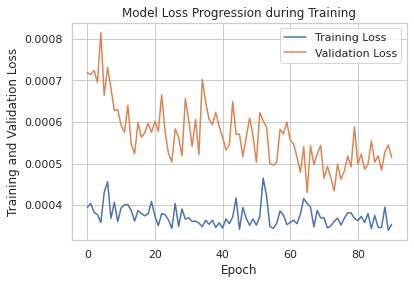

In [147]:
plot_model_loss(epochs_hist)

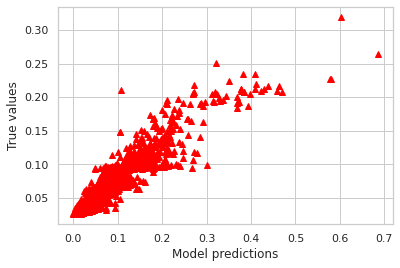

In [148]:
y_predict = model.predict(X_test)

plot_result_comparison(y_test, y_predict)

In [149]:
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

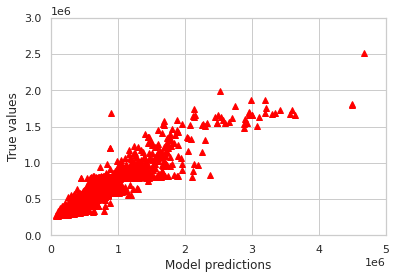

In [150]:
plot_result_comparison(y_test_original, y_predict_original)
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [151]:
calculate_metrics(X_test, y_test_original, y_predict_original)

RMSE = 197005.233 
MSE = 38811062018.71102 
MAE = 102097.20174555802 
R2 = 0.7219679379794738 
Adjusted R2 = 0.7172573043985537


In [152]:
epochs_hist = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
406/406 [==============================] - 1s 3ms/step - loss: 3.5967e-04 - val_loss: 4.8409e-04
Epoch 2/200
406/406 [==============================] - 1s 3ms/step - loss: 3.6528e-04 - val_loss: 4.5449e-04
Epoch 3/200
406/406 [==============================] - 1s 3ms/step - loss: 3.3730e-04 - val_loss: 5.2685e-04
Epoch 4/200
406/406 [==============================] - 1s 3ms/step - loss: 3.5985e-04 - val_loss: 4.6366e-04
Epoch 5/200
406/406 [==============================] - 1s 3ms/step - loss: 3.2475e-04 - val_loss: 5.2285e-04
Epoch 6/200
406/406 [==============================] - 1s 3ms/step - loss: 3.6240e-04 - val_loss: 5.2427e-04
Epoch 7/200
406/406 [==============================] - 1s 3ms/step - loss: 3.6450e-04 - val_loss: 4.9550e-04
Epoch 8/200
406/406 [==============================] - 1s 3ms/step - loss: 3.4550e-04 - val_loss: 5.4803e-04
Epoch 9/200
406/406 [==============================] - 1s 3ms/step - loss: 3.7484e-04 - val_loss: 5.0743e-04
Epoch 10/200
406/40

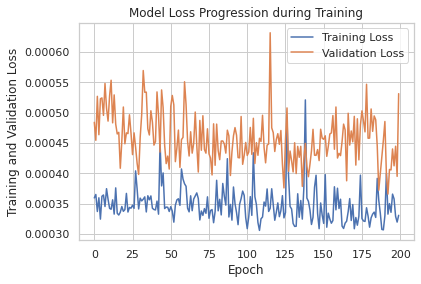

In [153]:
plot_model_loss(epochs_hist)

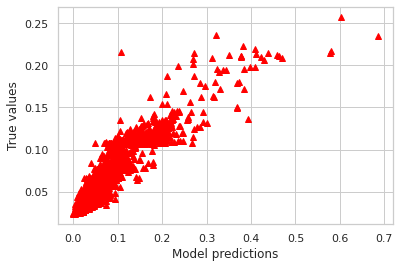

In [154]:
y_predict = model.predict(X_test)

plot_result_comparison(y_test, y_predict)

In [155]:
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

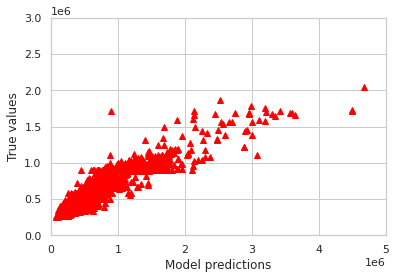

In [156]:
plot_result_comparison(y_test_original, y_predict_original)
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [157]:
calculate_metrics(X_test, y_test_original, y_predict_original)

RMSE = 202230.836 
MSE = 40897311197.11179 
MAE = 102521.41178222747 
R2 = 0.7070226071694137 
Adjusted R2 = 0.702058758269799
